In [11]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
import THANG as ta
%matplotlib inline

In [12]:

def critical_value(alpha):
    p=1-alpha/2
    return norm.ppf(p)

def critical_value_left(alpha):
    return norm.ppf(alpha)

def critical_value_right(alpha):
    p=1-alpha
    return norm.ppf(p)

alpha=0.05
print(critical_value(alpha))


1.959963984540054


In [13]:
data = pd.read_csv('gia_nha_dat_us.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [14]:
df = data[["MSSubClass","MSZoning","LotArea","SalePrice"]]
df

MSSubClass MSZoning  LotArea  SalePrice
0             60       RL     8450     208500
1             20       RL     9600     181500
2             60       RL    11250     223500
3             70       RL     9550     140000
4             60       RL    14260     250000
...          ...      ...      ...        ...
1455          60       RL     7917     175000
1456          20       RL    13175     210000
1457          70       RL     9042     266500
1458          20       RL     9717     142125
1459          20       RL     9937     147500

[1460 rows x 4 columns]

--------------------------------------------------


<Figure size 432x288 with 0 Axes>

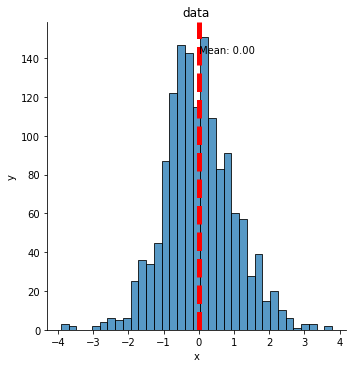

--------------------------------------------------


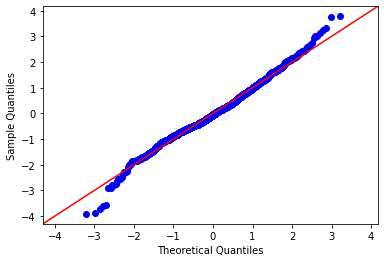

      SalePrice
0.25  -0.623453
0.50  -0.056462
0.75   0.625271
--------------------------------------------------


In [15]:
price=np.log1p(df['SalePrice'])
exam = ta.proj2(price)
exam.hist()
exam.qq()

Giả sử chúng ta có $150k, liệu chúng ta có mua được một ngôi nhà trung bình ở Mỹ không?
(Bài toán so sánh giá trị trung bình của mẫu với trung bình kỳ vọng lý thuyết)


In [16]:
my_mean = 150000
my_log_mean=np.log1p(my_mean)
print(my_log_mean)

11.918397239722838


Giả thiết thống kê:
    H0: n0= 11.918397239722838
    H1: n # 11.918397239722838
    

In [17]:
#lấy ngẫu nhiên 100 mẫu dữ liệu #
n=100
sample = price.sample(n)
sample

989     12.190964
1113    11.809327
1010    11.813037
1272    11.827744
658     11.487618
          ...    
626     11.848690
751     11.995358
485     11.898195
1373    13.053015
402     11.589896
Name: SalePrice, Length: 100, dtype: float64

In [18]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [25]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
from scipy import stats 
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value']= ztest(sample, value = np.log1p(my_mean))
results(p, alpha=0.05/2)

mean1      mean2     score   p_value                             KetLuan
  12.048336  11.918397  3.322893  0.000891  Chấp nhận H1 với mức ý nghĩa 0.025

In [22]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value']= ztest(sample,value = np.log1p(my_mean), alternative='smaller')
results(p)

mean1      mean2     score   p_value                            KetLuan
  12.048336  11.918397  3.322893  0.999555  Chấp nhận H0 với mức ý nghĩa 0.05

In [23]:

# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value']= ztest(sample, value = n, alternative='larger')
results(p)

mean1      mean2        score  p_value  \
  12.048336  11.918397 -2249.159264      1.0   

                            KetLuan  
  Chấp nhận H0 với mức ý nghĩa 0.05

In [24]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value']= ztest(sample, value = np.log1p(my_mean), alternative='larger')
results(p)

mean1      mean2     score   p_value                            KetLuan
  12.048336  11.918397  3.322893  0.000445  Chấp nhận H1 với mức ý nghĩa 0.05